# Comparing Data Scientist Salaries of the US vs Great Britain
### Group 3 Final Report

## Introduction

Data science is an increasingly popular field as industries have begun to realize the importance and value of data analysis (Waller & Fawcett, 2013). As such, the demand for skilled data scientists has and continues to grow. Being students in STAT 201: Introduction to Statistics for Data Science, we are interested in the salaries that data scientists might have. A 2015 data science salary survey published by O’Reilly Media reported that the median annual base salary of US respondents was greater than those from the UK, Ireland, and the rest of Europe. The same survey also reported that 67% of their survey respondents were from the USA and 18% were from Europe, including the United Kingdom and Ireland (King & Magoulas, 2015).

While the 2015 salary metrics are known, we wanted to compare more recent salaries of data scientists who work at companies based in the USA versus Great Britain (GB). Since the US and GB are countries with the highest number of data scientists, we chose to only compare those two. The exact question we wanted to explore is:

***Are the salaries of data scientists greater for those who work at companies based in the USA vs companies based in GB?***

To answer this question, we will perform statistical inference on the Data Science Job Salaries dataset from Kaggle, with responses coming from the website ai-jobs.net Salaries. The dataset includes variables such as the year of pay (2020 - 2022), experience level (EN Entry-level, Junior MI Mid-level, Intermediate SE Senior-level, Expert EX Executive-level, Director), salary in USD, employee's primary country of residency, country of the employer's main office or contracting branch, company size, and more.

We expect to see that the mean salary of US companies is the greater than the mean salary of GB companies, based on our life experience. So we set up the hypothesis testing: 
The null hypothesis  $H_0$  is that the mean salary of US companies is the same as the mean salary of GB companies. 
The alternative hypothesis  $H_a$  is that the mean salary in the US is higher than the mean salary of GB companies.

To compare salaries, we will use bootstrapping to identify the mean and interquartile ranges for data scientists’ salaries of those working for companies from the USA and GB.

## Methods and Results

Firstly, the necessary libraries are loaded.

In [1]:
## load libraries
library(cowplot)
library(infer)
library(repr)
library(tidyverse)
library(broom)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



The dataset, Data Science Job Salaries, is read into the variable `data`. The columns salary in USD and company location are selected and responses of our desired company locations are filtered for.

In [2]:
## read dataset from web; clean and wrangle data into tidy format
data <- read_csv("https://raw.githubusercontent.com/SotaUe/Stat201/main/ds_salaries.csv") %>%
    select(salary_in_usd, company_location) %>%
    filter(company_location %in% c("US", "GB"))

# counting the size of each in "company location"
count <- data %>%
    count(company_location) %>%
    arrange(desc(n))

New names:
• `` -> `...1`
Rows: 607 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): experience_level, employment_type, job_title, salary_currency, empl...
dbl (5): ...1, work_year, salary, salary_in_usd, remote_ratio

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


### Table 1

In [3]:
head(data)

salary_in_usd,company_location
<dbl>,<chr>
109024,GB
150000,US
72000,US
190000,US
135000,US
87000,US


### Table 2

In [4]:
count

company_location,n
<chr>,<int>
US,355
GB,47


As the Table 2 shows, the whole dataset includes 47 respondents working at a company based in Great Britain and 399 respondents working at a company based in the United States.

The following code randomly selects 40 responses from our raw data of each category (US or GB company) and calculates the sample means. 

In [5]:
set.seed(11) # set seed for reproducibility

# making a sample for the US
us_sample <- data %>% 
    filter(company_location == "US") %>%
    rep_sample_n(size = 40)

# making a sample for GB
gb_sample <- data %>%
    filter(company_location == "GB") %>%
    rep_sample_n(size = 40)

# calculating the observed mean for the US
US_mean <- us_sample %>%
    summarize(mean_salary_in_usd = mean(salary_in_usd)) %>%
    select(mean_salary_in_usd)%>%
    as.numeric()

# calculating the observed mean for GB
GB_mean <- gb_sample %>%
    summarize(mean_salary_in_usd = mean(salary_in_usd)) %>%
    select(mean_salary_in_usd) %>%
    as.numeric()

# putting the means together in a table
table_means <- tibble(US_mean, GB_mean)

### Table 3

In [6]:
table_means

US_mean,GB_mean
<dbl>,<dbl>
125764.3,80665.02


The results of table 3 show respondents working for US companies have an average salary greater than respondents working for GB companies. However, we should not only look at the mean.

The code below creates a box plot visualization of the bootstrap samples to show the mean and interquartile ranges of the samples against each other. In addition, the distribution of the bootstrap samples can be seen in the histogram plots.

In [85]:
options(repr.plot.width = 14, repr.plot.height = 10, scipen = 1) # making plot fit and removing scientific notation 

# visualize the sample distribution for the US
us_sample_dist <- us_sample %>%
    ggplot(aes(x= salary_in_usd))+
    geom_histogram(bins=10) +
    ggtitle("US Salary Sample Distribution") +
    xlab("Salary (USD)") + 
    scale_x_continuous(labels=scales::dollar_format()) + 
    theme(text = element_text(size = 14))

# visualize the sample distribution for GB
gb_sample_dist <- gb_sample %>%
    ggplot(aes(x= salary_in_usd)) +
    geom_histogram(bins=10) +
    ggtitle("GB Salary Sample Distribution") +
    xlab("Salary (USD)") + 
    scale_x_continuous(labels=scales::dollar_format()) + 
    theme(text = element_text(size = 14))

# making a side-by-side boxplot to compare the sample distribution
box_plot <- data %>%
    ggplot(aes(x = company_location, y = salary_in_usd, colour = company_location)) +
    geom_boxplot() +
    labs(title = "Salaries of Data Scientists (2020-2022)", x = "Company Country", y = "Salaries (USD)") +
    scale_y_continuous(labels=scales::dollar_format()) + 
    theme(text = element_text(size = 18))

### Figure 1

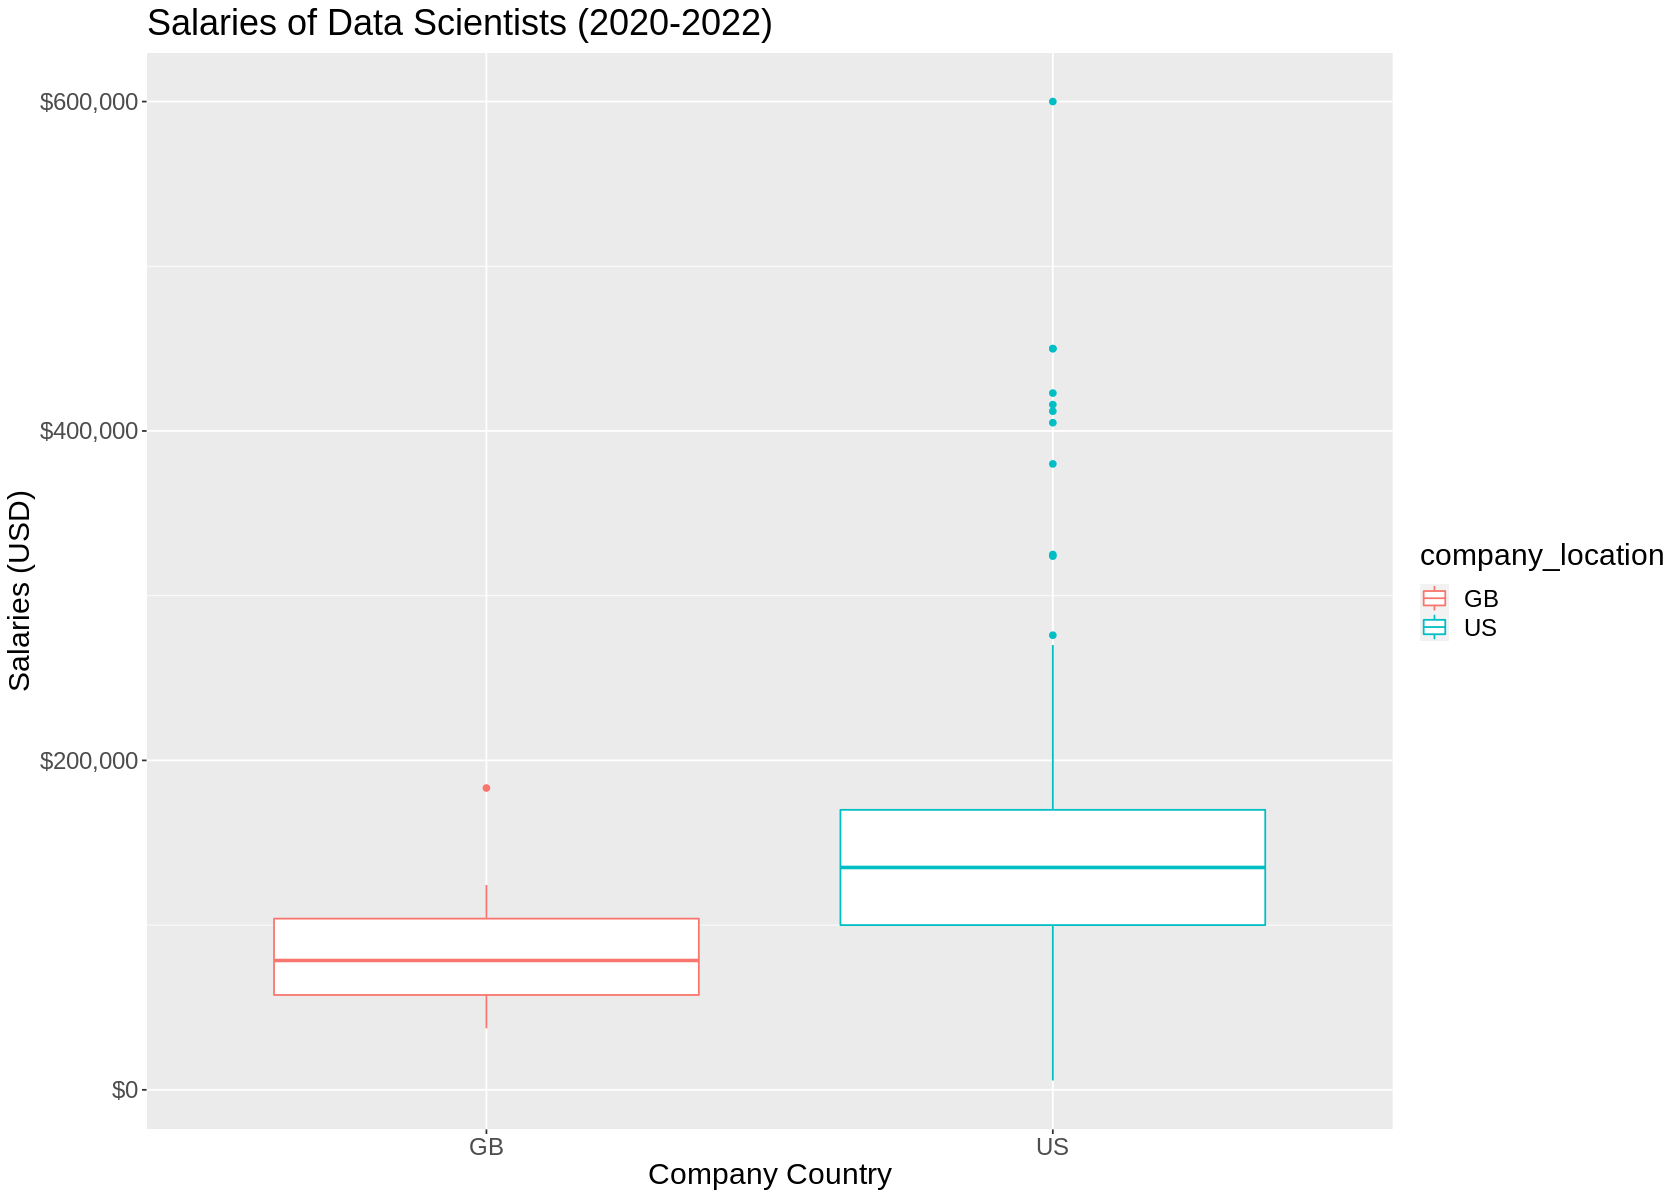

In [86]:
box_plot

### Fig. 2

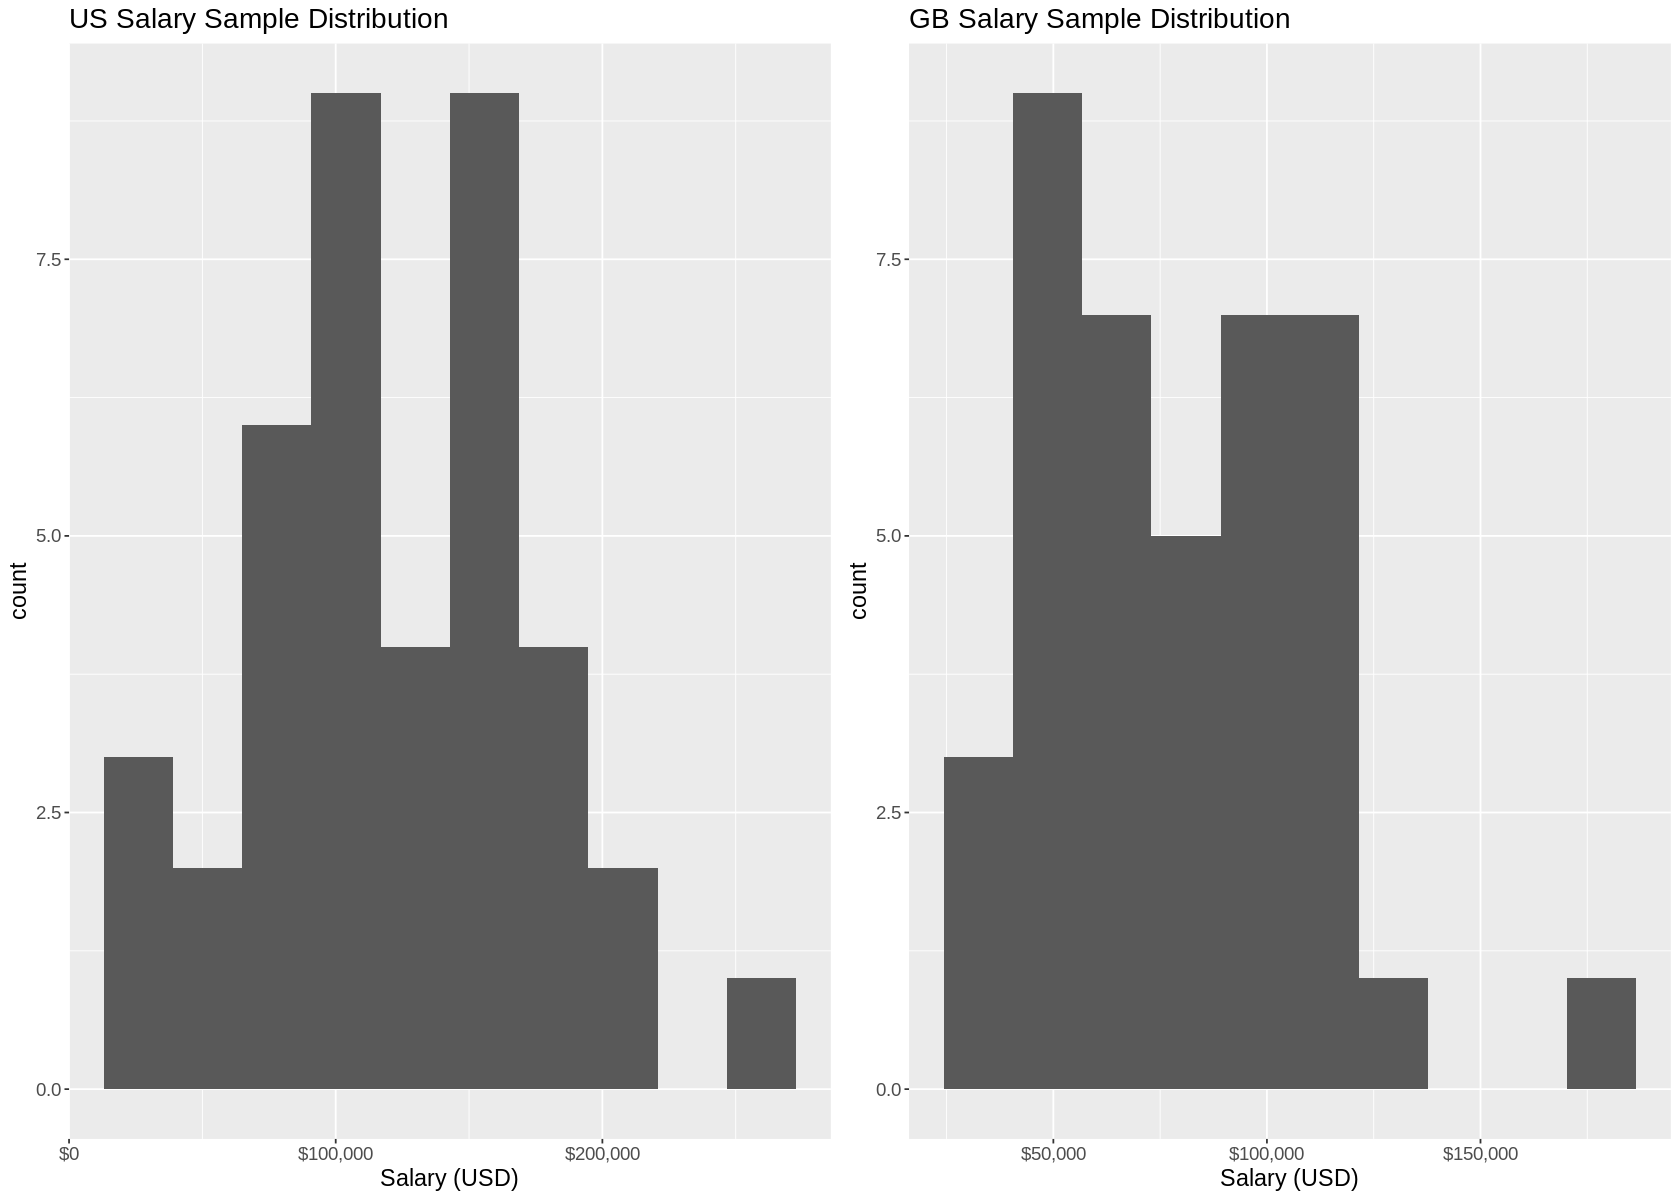

In [87]:
plot_grid(us_sample_dist, gb_sample_dist)

To take a closer look at our bootstrap samples, we calculated their 95% confidence intervals.

In [88]:
# calculating the CI of the US
confidence_int_US <- us_sample %>%
    summarize(lower_ci = quantile(salary_in_usd, 0.025), 
              upper_ci = quantile(salary_in_usd, 0.975)) %>%
    select(-replicate)

confidence_int_US

lower_ci,upper_ci
<dbl>,<dbl>
37211.58,216667.5


In [89]:
# calculating the CI of GB
confidence_int_GB <- gb_sample %>%
    summarize(lower_ci = quantile(salary_in_usd, 0.025), 
              upper_ci = quantile(salary_in_usd, 0.975))%>%
    select(-replicate)

confidence_int_GB

lower_ci,upper_ci
<dbl>,<dbl>
39213.93,125805.4


The lower limits (LL) of the confidence intervals are approximately $20 000 apart, whereas the upper limits (UL) of the intervals differ by around 90 000.

As the comparisons are hard to make with samples of size 40, we should use a method to create an estimation of the sampling distributions for Data Scientist Salaries. To do this, we will perform bootstrapping using the `infer` package. Bootstrap samples with 10,000 replicates of our original samples can be created while making sure we resample with replacement.

In [12]:
set.seed(11) # set seed for reproducibility
 
# generating the bootstrap sampling for the US and calculating the mean for each repetition
us_bootstrap <- us_sample %>%
    specify(response = salary_in_usd) %>%
    generate(type = "bootstrap", reps = 10000, replace = TRUE) %>%
    calculate("mean")
    
# generating the bootstrap sampling for GB and calculating the mean for each repetition
gb_bootstrap <- gb_sample %>%
    specify(response = salary_in_usd) %>%
    generate(type = "bootstrap", reps = 10000, replace = TRUE) %>%
    calculate("mean")
 
head(us_bootstrap)
head(gb_bootstrap)

replicate,stat
<int>,<dbl>
1,121532.9
2,117612.1
3,128524.9
4,129499.2
5,126971.7
6,135006.2


replicate,stat
<int>,<dbl>
1,80595.62
2,74593.27
3,75397.15
4,75241.18
5,85529.77
6,78490.98


The distributions are graphed with their respective sample means.

In [13]:
options(repr.plot.width = 15, repr.plot.height = 10, scipen = 3) # making plot fit and removing scientific notation 

us_bootstrap <- us_bootstrap %>%
    mutate(country = "US")

gb_bootstrap <- gb_bootstrap %>%
    mutate(country = "GB")

bootstraps <- rbind(us_bootstrap, gb_bootstrap)

In [14]:
options(repr.plot.width = 20, repr.plot.height = 10, scipen = 1) # making plot fit and removing scientific notation 
set.seed(11) # set seed for reproducibility

# plotting bootstrap distribution for the US
us_bootstrap_dist <- us_bootstrap %>%
    ggplot(aes(x = stat)) +
    geom_histogram(binwidth = 1000) +
    theme(text= element_text(size=20)) +
    geom_vline(aes(xintercept = US_mean), colour = "blue", size = 2) + # Plotting observed mean as vertical line
    labs(title = "Bootstrap Distribution for the United States", x = "Mean Salary (USD)") +
    scale_x_continuous(labels=scales::dollar_format())

# plotting bootstrap distribution for GB
gb_bootstrap_dist <- gb_bootstrap %>%
    ggplot(aes(x = stat)) +
    geom_histogram(binwidth = 1000) +
    theme(text= element_text(size=20)) +
    geom_vline(aes(xintercept = GB_mean), colour = "red", size = 2) +  # Plotting observed mean as vertical line
    labs(title = "Bootstrap Distribution for Great Britain", x = "Mean Salary (USD)") +
    scale_x_continuous(labels=scales::dollar_format())

us_gb_distributions <- ggplot(bootstraps, aes(stat, fill = country)) + 
    geom_histogram(alpha = 0.8, position = 'identity', binwidth = 1000) +
    theme(text= element_text(size=20)) +
    geom_vline(aes(xintercept = US_mean), colour = "blue", size = 2) + # Plotting observed US mean as vertical line
    geom_vline(aes(xintercept = GB_mean), colour = "red", size = 2) +  # Plotting observed GB mean as vertical line
    labs(title = "Bootstrap Distribution for GB & US Samples (n = 40)", x = "Mean Salary (USD)") +
    scale_x_continuous(labels=scales::dollar_format())

### Fig. 3

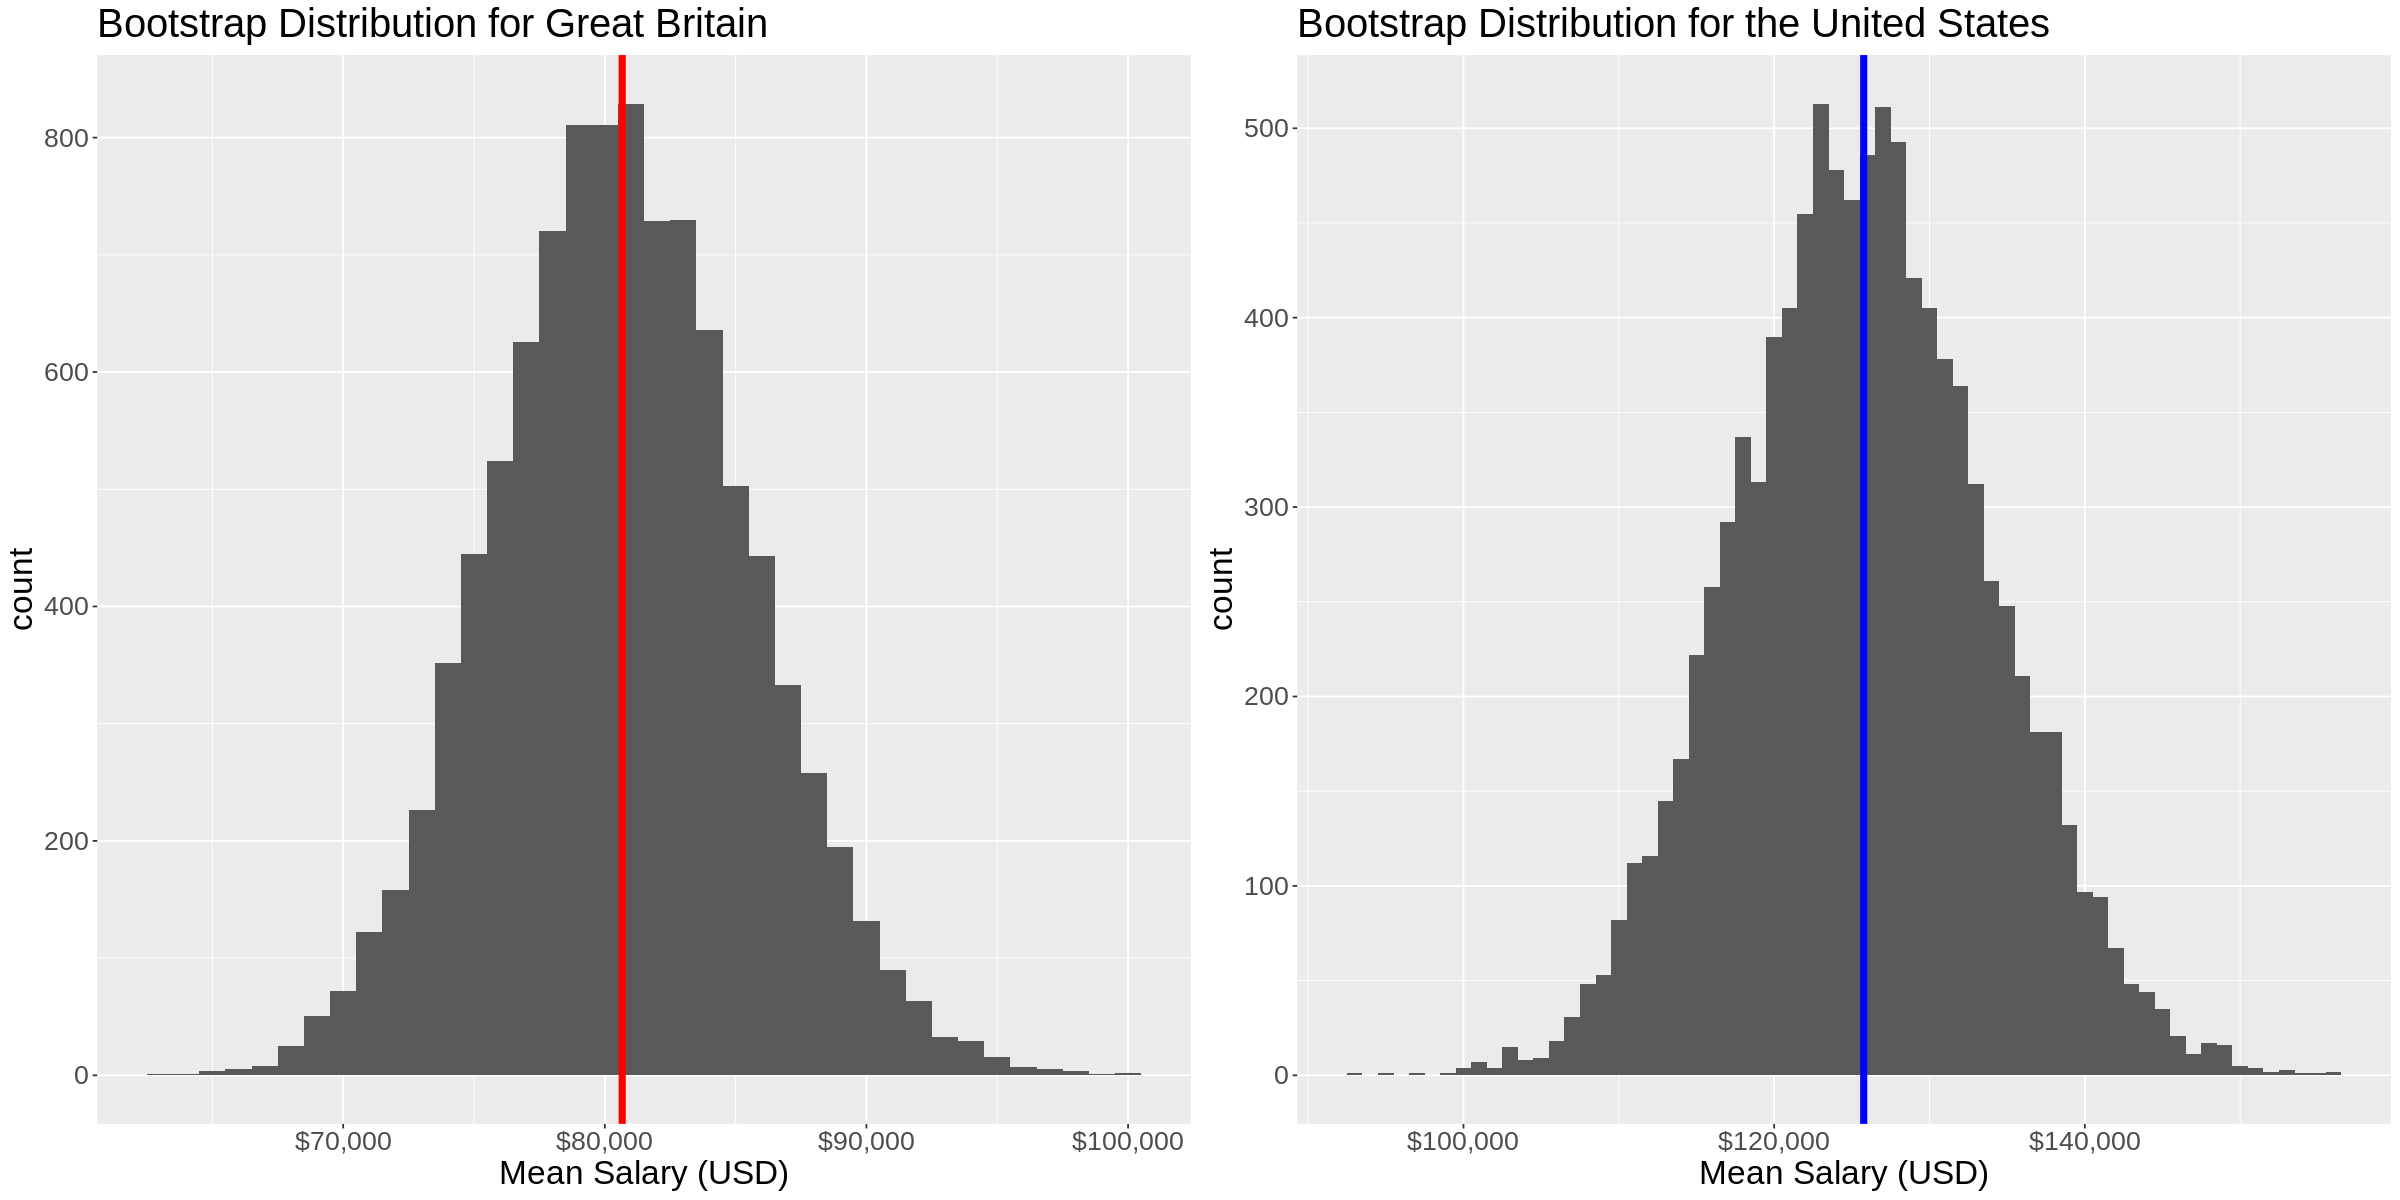

In [15]:
plot_grid(gb_bootstrap_dist, us_bootstrap_dist)

### Fig. 4

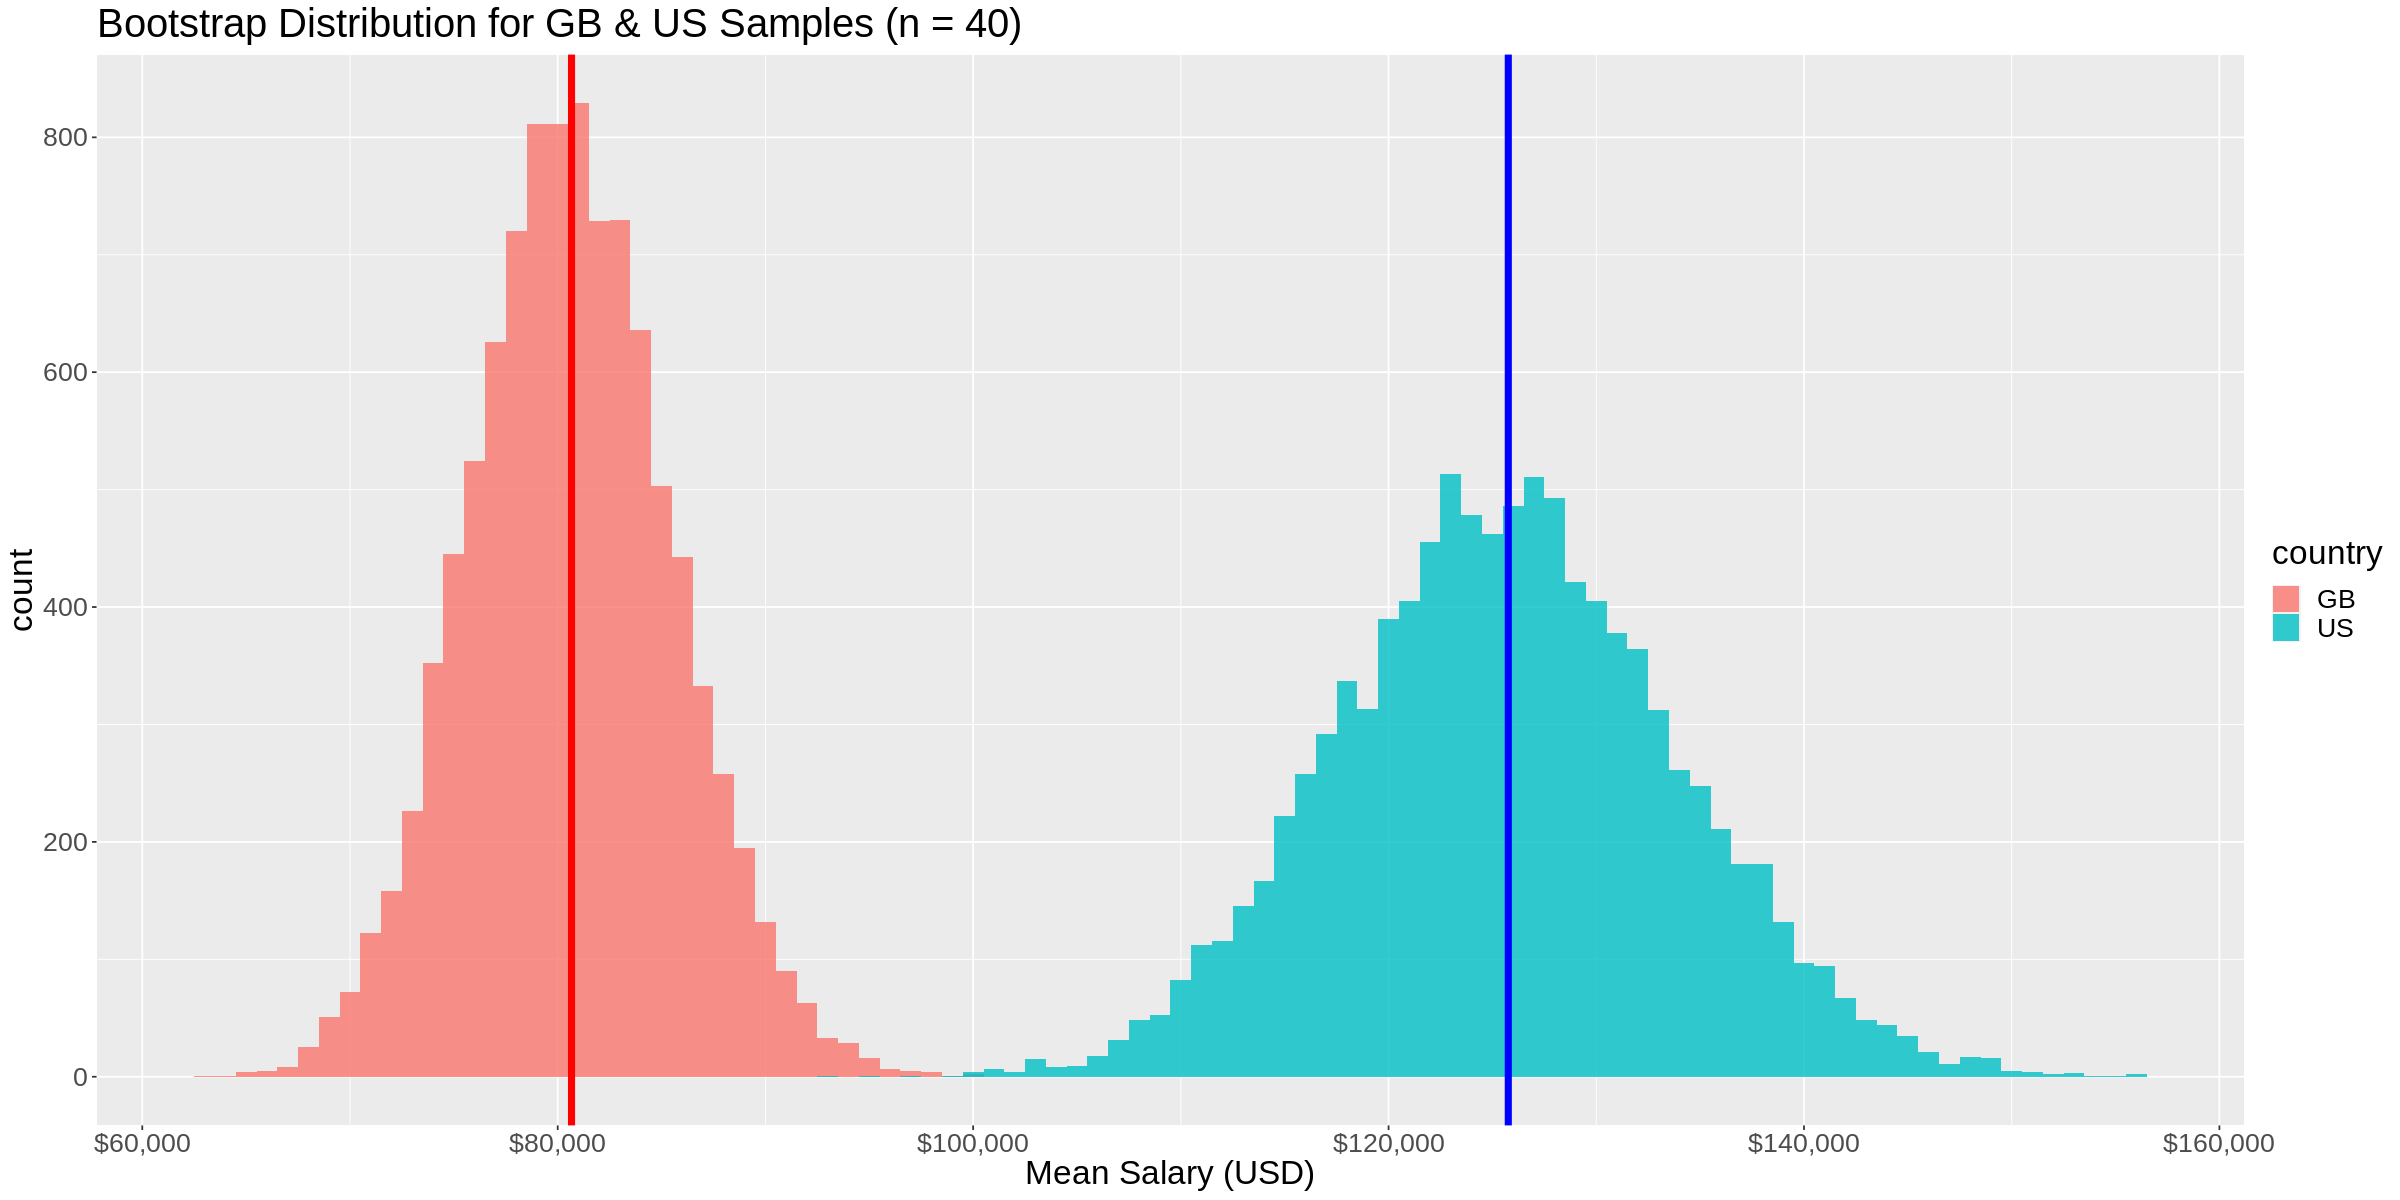

In [16]:
us_gb_distributions

In fig. 4, we show the result of the bootstrapping distributions approximating the sampling distribution. The range and variance of the us_sample is larger than the range and variance of the GB sample.

In [61]:
# calculating the bootstrap CI of the US
bootstrap_ci_US <- us_bootstrap %>%
    summarize(lower_ci = quantile(stat, 0.025), 
              upper_ci = quantile(stat, 0.975))

# calculating the bootstrap CI of GB
bootstrap_ci_GB <- gb_bootstrap %>%
    summarize(lower_ci = quantile(stat, 0.025), 
              upper_ci = quantile(stat, 0.975))

# visualizing the confidence intervals on the bootstrap distributions
US_CI_dist <- us_bootstrap_dist +
    annotate("rect",
             xmin = bootstrap_confidence_int_US$lower_ci, xmax = bootstrap_confidence_int_US$upper_ci,
             ymin = 0, ymax = Inf,                           # shaded range of CI
             fill = "deepskyblue", alpha = 0.3) +            # shading in the region of the CI
    geom_vline(aes(xintercept = bootstrap_confidence_int_US$lower_ci), linetype = "dashed") +
    geom_vline(aes(xintercept = bootstrap_confidence_int_US$upper_ci), linetype = "dashed") +
    annotate("text", x = 100000, y = 600, label = "LL: $110 163.30", size = 6) +
    annotate("text", x = 150000, y = 600, label = "UL: $141 897.20", size = 6)

GB_CI_dist <- gb_bootstrap_dist +
    annotate("rect",
             xmin = bootstrap_confidence_int_GB$lower_ci, xmax = bootstrap_confidence_int_GB$upper_ci,
             ymin = 0, ymax = Inf,                            # shaded range of CI
             fill = "deepskyblue", alpha = 0.3) +             # shading in the region of the CI
    geom_vline(aes(xintercept = bootstrap_confidence_int_GB$lower_ci), linetype = "dashed") +
    geom_vline(aes(xintercept = bootstrap_confidence_int_GB$upper_ci), linetype = "dashed") +  
    annotate("text", x = 66000, y = 800, label = "LL: $71 275.47", size = 6) +
    annotate("text", x = 95000, y = 800, label = "UL: $90 487.62", size = 6)

bootstrap_ci_GB
bootstrap_ci_US

lower_ci,upper_ci
<dbl>,<dbl>
71275.47,90487.62


lower_ci,upper_ci
<dbl>,<dbl>
110163.3,141897.2


Since bootstrapping creates an approximation of the sampling distribution, we could say that we are 95% confident that the mean salary of GB lies between 71275.47 USD and 90487.62 USD, and we are also 95% confident that the mean salary of US lies between 110163.3 USD and 141897.2 USD.

### Fig. 5

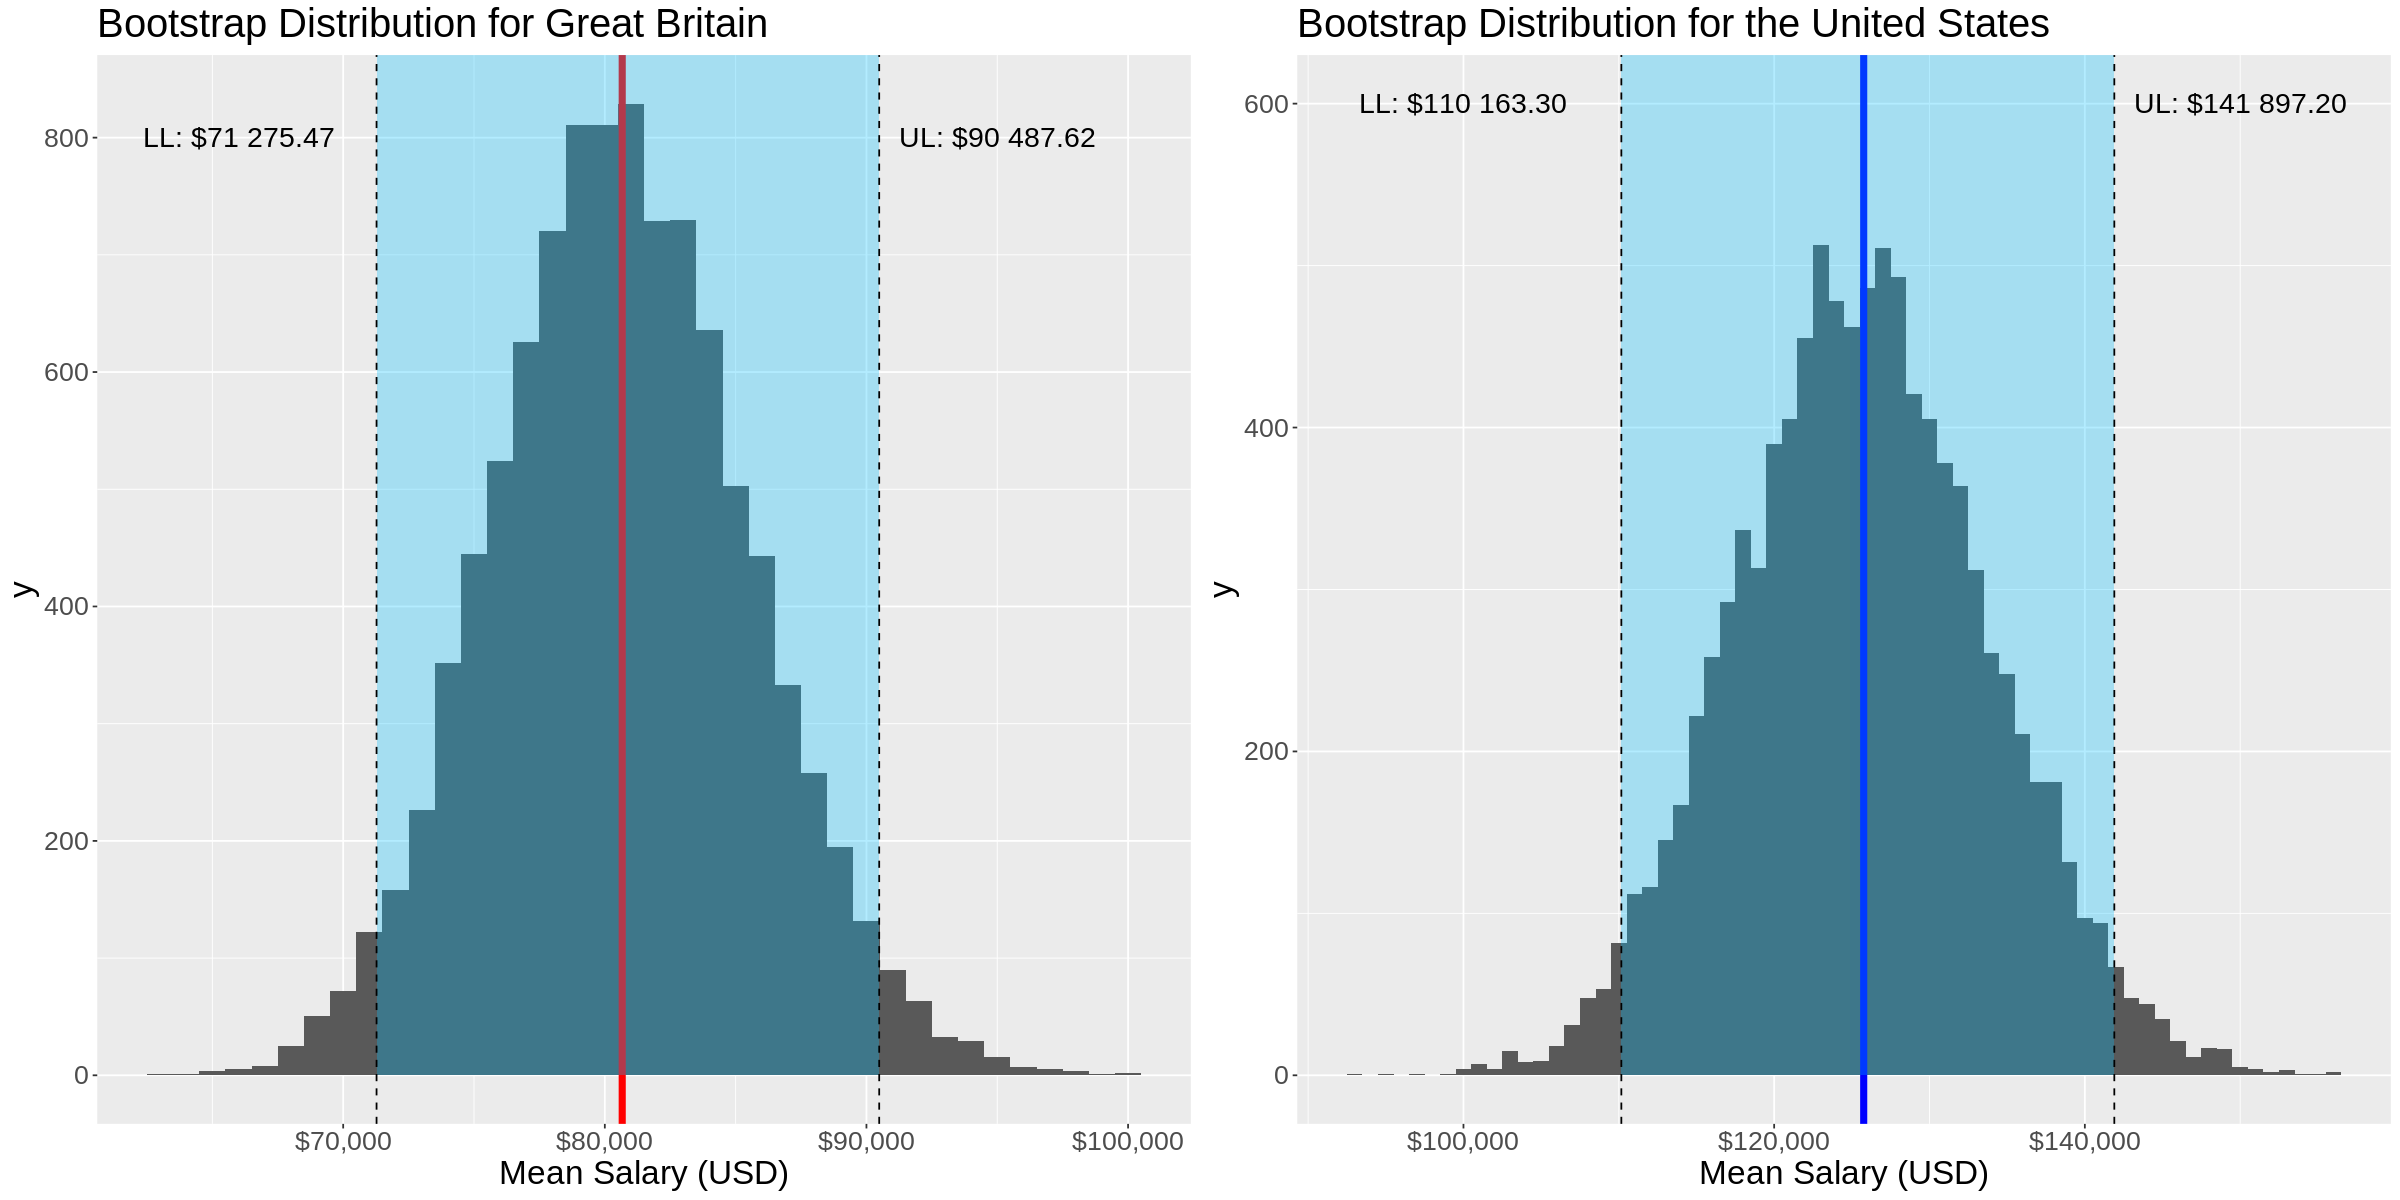

In [62]:
plot_grid(GB_CI_dist, US_CI_dist)

The plots clearly identify that the mean salaries are different for those working for companies out of the US vs GB. The overlap between the bootstrap sampling distributions is minimal. Furthermore, their confidence intervals have no overlap at all.

Alternatively, we can perform a two-sample t-test against our hypothesis by calculating the p-value using the `t.test()` function.

In [19]:
# doing the t-test
us_gb_ttest <- tidy(
    t.test(y = gb_sample$salary_in_usd,
           x = us_sample$salary_in_usd,
           alternative = "greater",
           conf.level = 0.95) )

### Table 4

In [20]:
us_gb_ttest

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
45099.28,125764.3,80665.02,4.667069,8.036725e-06,64.0281,28971.21,Inf,Welch Two Sample t-test,greater


We can see the p-value is very small. At the 5% significance level we should reject the null hypothesis. Here in table 4, we only focus on the p value.

In addition, we want to investigate the difference between US and GB salary levels by bootstrapping. To do this, we calculate the difference in means between the two groups of the entire dataset using the `infer` package and finding the 95% confidence interval of the difference.

In [93]:
# calculate the bootstrap CI of difference between mean salary level in US and GB
diff_bootstrap <- data %>%
    filter(company_location %in% c("US", "GB")) %>%
    specify(salary_in_usd ~ company_location) %>%
    generate(type = "bootstrap", reps = 10000) %>%
    calculate(stat = "diff in means", order = c("US", "GB"))

# calculating the CI of difference in bootstrap mean
confidence_int_diff <- diff_bootstrap %>%
    get_ci(level = 0.95, type = "percentile")

# visualize the confidence intervals on the bootstrap distributions of differences in salary level in US and GB
confidence_int_diff_dist  <- visualize(diff_bootstrap) + 
    shade_ci(endpoints = confidence_int_diff) +
    labs(title = "Mean Difference for US and GB Salaries", x = "Difference in Mean Salary (USD)") +
    theme(text= element_text(size = 20)) +
    scale_x_continuous(labels=scales::dollar_format()) +
    annotate("text", x = 47000, y = 2000, label = "LL: $51 287.38", size = 7) +
    annotate("text", x = 78000, y = 2000, label = "UL: $73 434.94", size = 7)

In [94]:
confidence_int_diff 

lower_ci,upper_ci
<dbl>,<dbl>
51189.81,73778.62


### Fig. 6

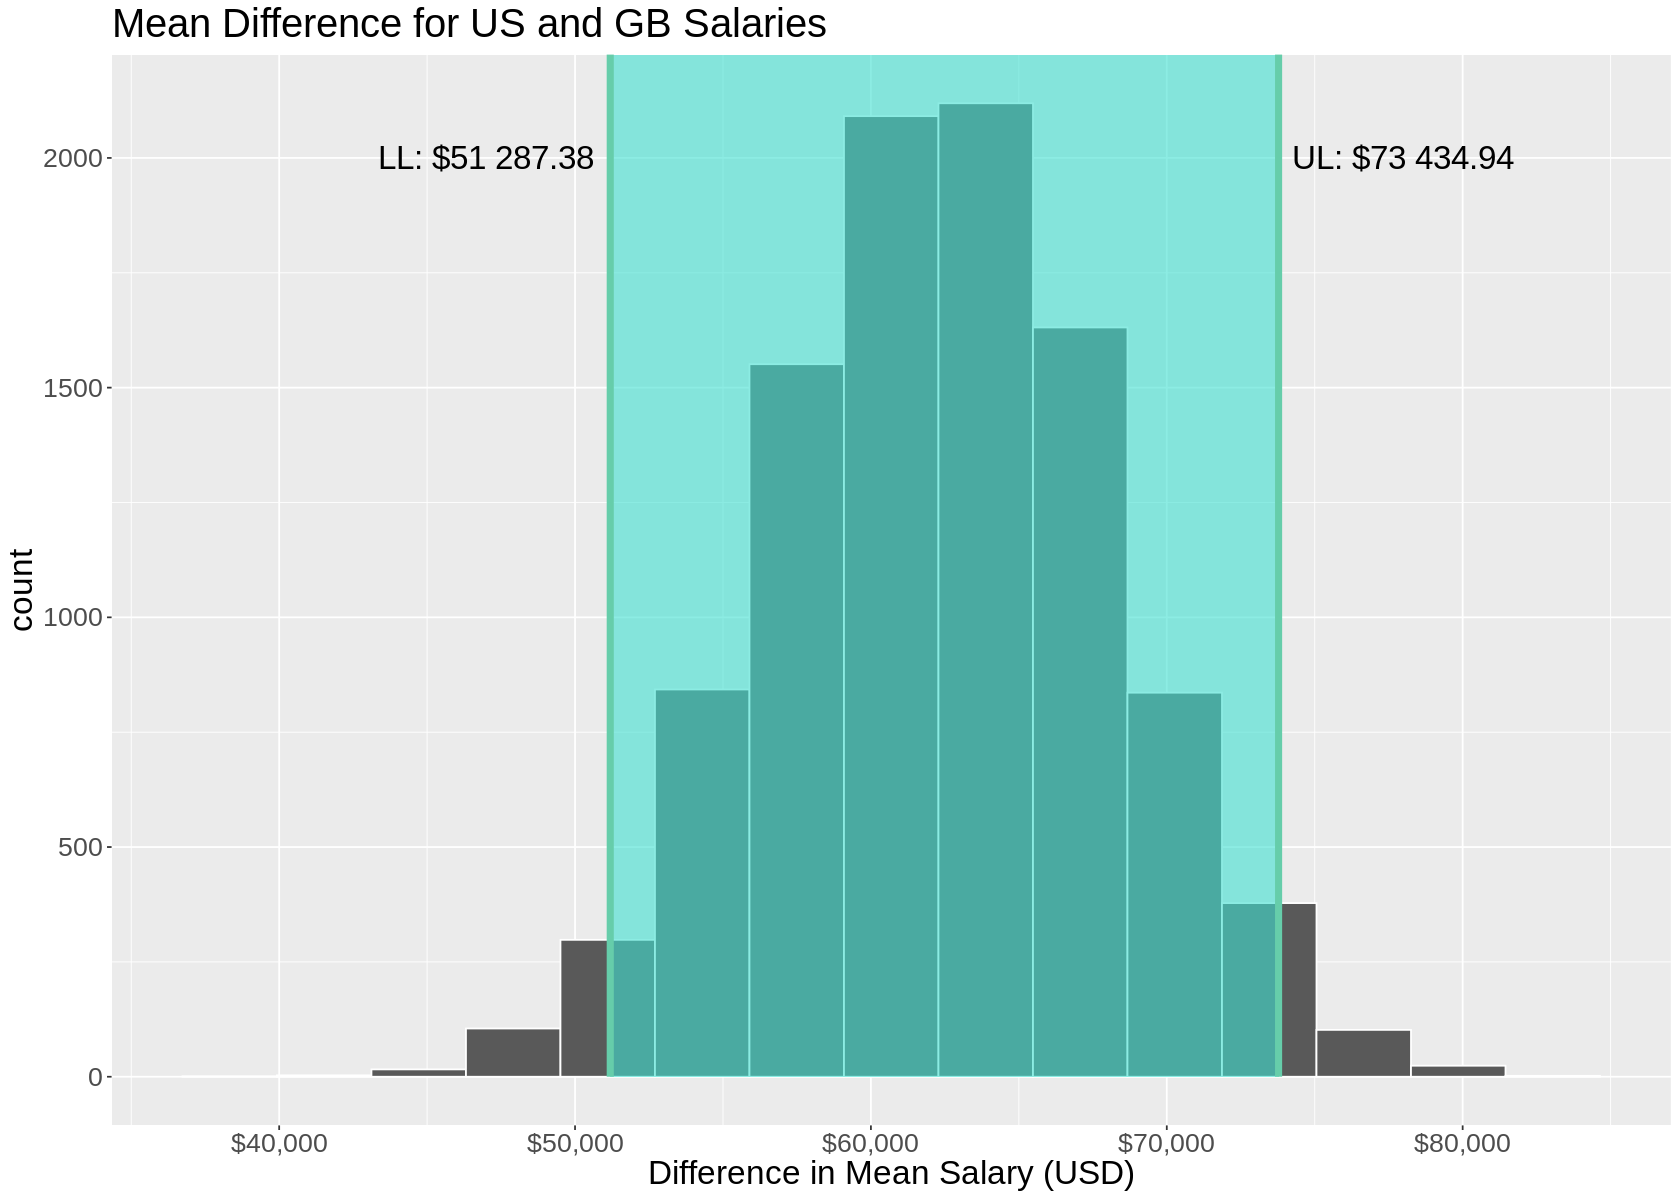

In [95]:
confidence_int_diff_dist

From fig. 6, we are now able to conclude that we are 95% confident that the difference in mean salary levels between data scientists in US and GB are between 51550.17 USD and 73760.74 USD, such a large difference!

For the exploration of our question, we used both bootstrapping and *t*-test approaches to achieve the same conclusion. The more efficient method to answer the question was to perform a *t*-test and achieve a *p*-value. However, with the bootstrapping method, one can clearly see a difference in the distributions. The different variances of the samples is worth noting and cannot be identified as obviously with the *t*-test method. 

## Discussion

The null hypothesis $H_0$ is that the mean salary of data scientists working at US companies is the same as the mean salary of data scientists working at GB companies. The alternative hypothesis $H_a$ is that the mean salary of data scientists working at US companies is higher than those of GB companies. Based on our hypothesis test at alpha level = 0.05, a 95% confidence interval for salaries was found for both regions and a two sample t-test was performed. What resulted was an extremely small p-value (*p* < .001) as seen in Table 4, indicating that the null hypothesis is unlikely to occur under our assumed circumstances, and the alternative hypothesis is likely. 

Therefore, we can reasonably conclude that the mean salary of US companies for data scientists is higher than that of GB companies. This result aligns with our expectations. What is interesting is that when the confidence intervals of the samples were examined, the lower bound was similar for both US and GB regions, around 38 000 USD, while the upper bound for the US sample was significantly higher than the GB sampe by fifty thousand USD. This also corroborates with the trends observed from the box plots, which show there are a fair amount of outliers making far more than the average data scientist in the US. Finally, comparing the means of the sampling distributions of both regions, the U.S mean was around 120K USD, while the GB mean was around 80K USD. 

Based on these observations, it can be theorized that there are more data scientists in the US making salaries far above the mean, skewing the mean salary of US data scientists higher. It could be possible that for similar positions, companies in the US and GB pay similar rates, but there are simply more advanced or high-ranking positions in the US. However, such conclusions cannot be made from our current analysis of the data. Perhaps for future investigations, the seniority and company size variables of this dataset can be used to analyze the current and historical data to gain further insight into this topic.

Regardless, our current investigation still carries a couple implications. Although we cannot make definitive statements about the shape of the distributions of data scientist salaries in the US and UK, our investigations into the mean values and interquartile range can be an indicator that the overall job market for the US is better for data scientists than that of Great Britain. A prospective data scientist, when faced with the decision of choosing between two prominent markets of the US and United Kingdom, should choose the States if salary is their only concern. Other factors that may contribute to this decision, such as cost of living and advancement opportunities, can also be subjects of further investigation. 


## References

Bhatia, R. (2022, June). Data Science Job Salaries: Salaries of Jobs in the Data Science Domain, Version 1. Retrieved July 21, 2022 from https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries.

King, J., & Magoulas, R. (2015). 2015 data science salary survey. O'Reilly Media, Incorporated.
http://www.eli.sdsu.edu/courses/fall16/cs696/2015-data-science-salary-survey.pdf

Waller, M. A., & Fawcett, S. E. (2013). Data science, predictive analytics, and big data: a revolution that will transform supply chain design and management. Journal of Business Logistics, 34(2), 77-84.
https://onlinelibrary.wiley.com/doi/full/10.1111/jbl.12010
